# EN 2550 - Fundamentals of Image Processing and Machine Vision
## Assignment 01
## 180616T P.M.P.H. Somarathne

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

## Question 01
Running point operations and spatial filtering operations on an image

Choosen image: sigiriya.jpg in grayscale

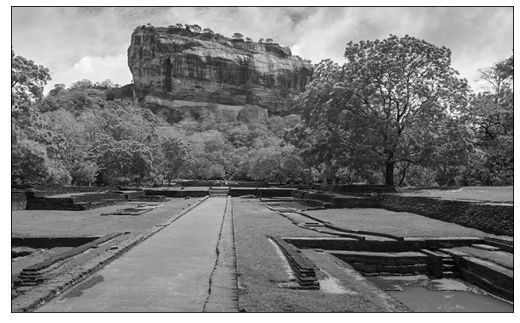

In [55]:
image = cv.imread('a01images/sigiriya.jpg',cv.IMREAD_GRAYSCALE)
color_image = cv.imread('a01images/sigiriya.jpg',cv.IMREAD_COLOR)

cv.imwrite('Outputs/sigiriya_gray.png',image)

fig,ax = plt.subplots(figsize=(9,6))
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.set_xticks([]), ax.set_yticks([])
plt.show()

### (a) Histogram Computation

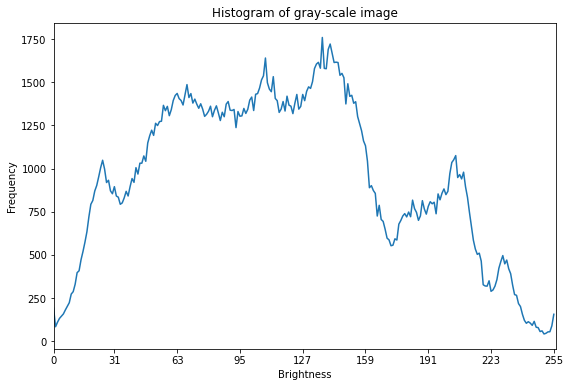

In [69]:
hist = cv.calcHist([image],[0],None,[256],[0,256])

fig,ax = plt.subplots(figsize=(9,6))
ax.plot(hist)
plt.xlim([0,256])
ax.set_title('Histogram of gray-scale image')
ax.set_xlabel('Brightness'), ax.set_ylabel('Frequency'), ax.set_xticks([0,31,63,95,127,159,191,223,255])
plt.savefig('Outputs/Histogram.png')
plt.show()

### (b) Histogram Equalization

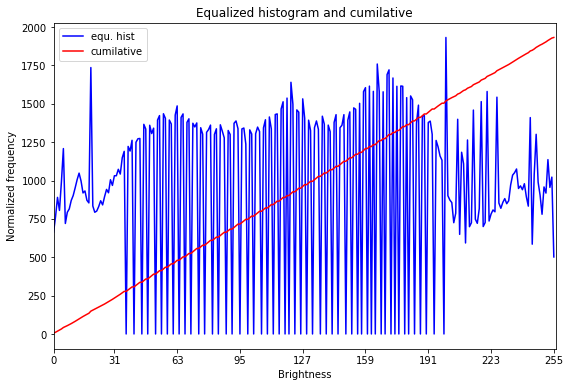

In [78]:
equ_image = cv.equalizeHist(image)

equ_hist = cv.calcHist([equ_image],[0],None,[256],[0,256])
equ_hist_cumm = equ_hist.cumsum()
equ_hist_cumm_normalized = equ_hist_cumm * equ_hist.max() / equ_hist_cumm.max()

cv.imwrite('Outputs/Equalized_Image.png',equ_image)

fig,ax = plt.subplots(figsize=(9,6))
ax.plot(equ_hist,'b',label='equ. hist')
ax.plot(equ_hist_cumm_normalized,'r',label='cumilative')
plt.xlim([0,256])
ax.legend()
ax.set_title('Equalized histogram and cumilative')
ax.set_xlabel('Brightness'), ax.set_ylabel('Normalized frequency'), ax.set_xticks([0,31,63,95,127,159,191,223,255])
plt.savefig('Outputs/Equalized_Histogram.png')
plt.show()

### (c) Intensity Transformations

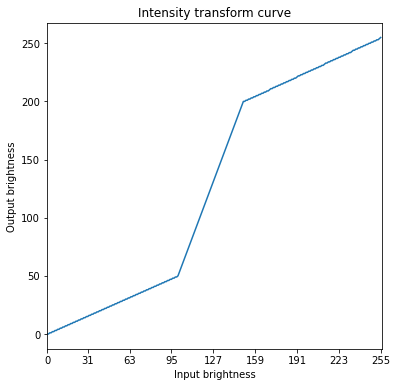

In [74]:
x1,y1 = (100,50)
x2,y2 = (150,200)
transform = np.concatenate([np.floor((y1-0)*np.arange(0,x1)/(x1-0)),\
                            np.floor((y2-y1)*np.arange(0,x2-x1)/(x2-x1)+y1),\
                            np.floor((255-y2)*np.arange(0,256-x2)/(255-x2)+y2)]).astype(np.uint8)

trans_image = transform[image]

cv.imwrite('Outputs/Intensity_Image.png',trans_image)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(transform)
plt.xlim([0,256])
ax.set_title('Intensity transform curve')
ax.set_xlabel('Input brightness'), ax.set_ylabel('Output brightness'), ax.set_xticks([0,31,63,95,127,159,191,223,255])
plt.savefig('Outputs/Intensity_Transform.png')
plt.show()

### (d) Gamma Correction

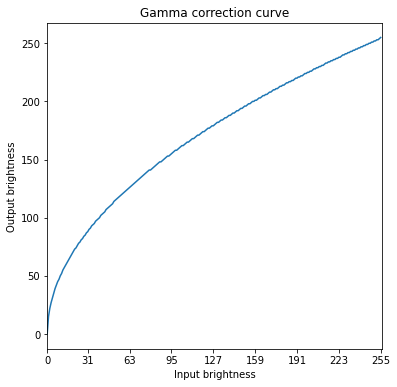

In [77]:
gamma = 0.5
gamma_table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

gamma_image = gamma_table[image]

cv.imwrite('Outputs/Gamma_Image.png',gamma_image)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(gamma_table)
plt.xlim([0,256])
ax.set_title('Gamma correction curve')
ax.set_xlabel('Input brightness'), ax.set_ylabel('Output brightness'), ax.set_xticks([0,31,63,95,127,159,191,223,255])
plt.savefig('Outputs/Gamma_correction.png')
plt.show()

### (e) Gaussian smoothing

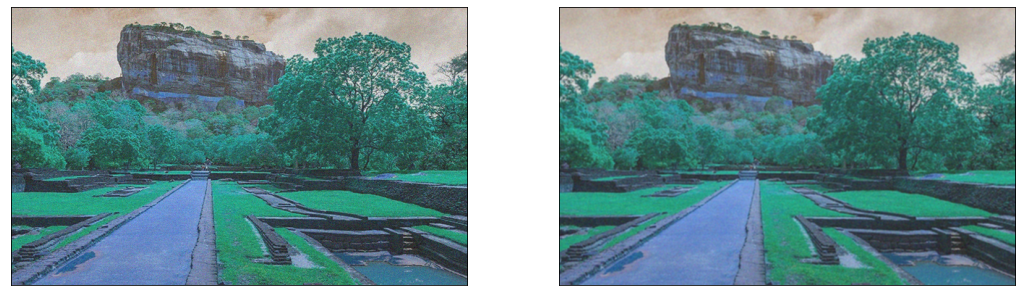

In [62]:
# Generate Gaussian noise
mean = 0
sigma = 0.
noise = np.random.normal(mean,sigma,color_image.shape)*255 # Adjusted to [0,255] range

# Add the noise to the image
noisy_image = cv.add(color_image.astype(np.float),noise)
noisy_image = cv.normalize(noisy_image, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# Filter the image
kernel_size = 3
filter_sigma = 1
gaussian_kernel = cv.getGaussianKernel(kernel_size, filter_sigma)
filtered_image = cv.sepFilter2D(noisy_image, -1, gaussian_kernel, gaussian_kernel)

cv.imwrite('Outputs/Noisy_Image.png',noisy_image)
cv.imwrite('Outputs/Gauss_filt_Image.png',filtered_image)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(filtered_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### (f) Unsharp Masking

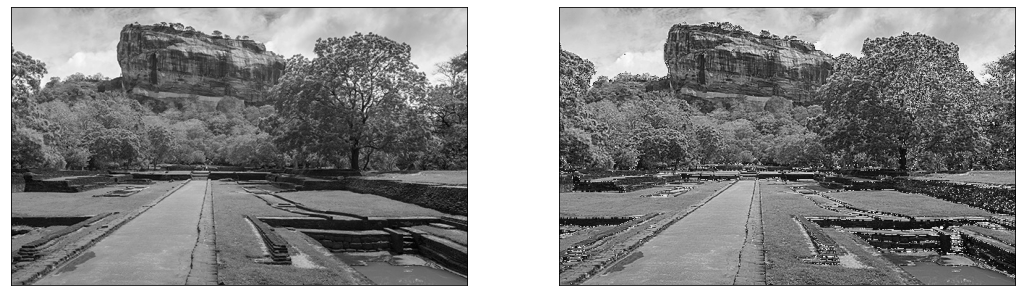

In [63]:
# Generating the blurred image
blur_size = 5
blur_sigma = 2
blur_kernel = cv.getGaussianKernel(blur_size, blur_sigma)
blurred_image = cv.sepFilter2D(image, -1, blur_kernel, blur_kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)

# Taking the difference image
difference_image = image.astype(np.float32) - blurred_image.astype(np.float32)

# Getting the sharpened image
alpha = 0.7
sharpened_image = cv.addWeighted(image.astype(np.float32), 1.0, difference_image, alpha, 0).astype(np.uint8)

cv.imwrite('Outputs/Blurred_Image.png',blurred_image)
cv.imwrite('Outputs/Difference_Image.png',difference_image)
cv.imwrite('Outputs/Unsharp_Image.png',sharpened_image)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(sharpened_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### (g) Median Filtering

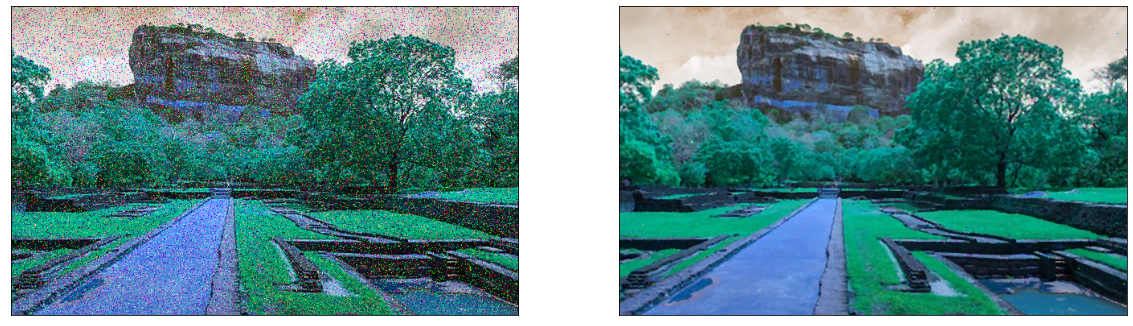

In [65]:
# Apply salt and pepper noise
salt_image = np.copy(color_image)
s_vs_p = 0.5
amount = 0.1
num_salt = np.ceil(amount * salt_image.size * s_vs_p)
coords = [np.random.randint(0, i-1, int(num_salt)) for i in salt_image.shape]
salt_image[coords] = 255
num_pepper = np.ceil(amount * salt_image.size * s_vs_p)
coords = [np.random.randint(0, i-1, int(num_pepper)) for i in salt_image.shape]
salt_image[coords] = 0

# Filter the image
median_filter_size = 3
median_filtered_image = cv.medianBlur(salt_image,median_filter_size)

cv.imwrite('Outputs/Salt_Image.png',salt_image)
cv.imwrite('Outputs/Median_filt_Image.png',median_filtered_image)

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(salt_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(median_filtered_image, cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### (h) Bilateral Filtering

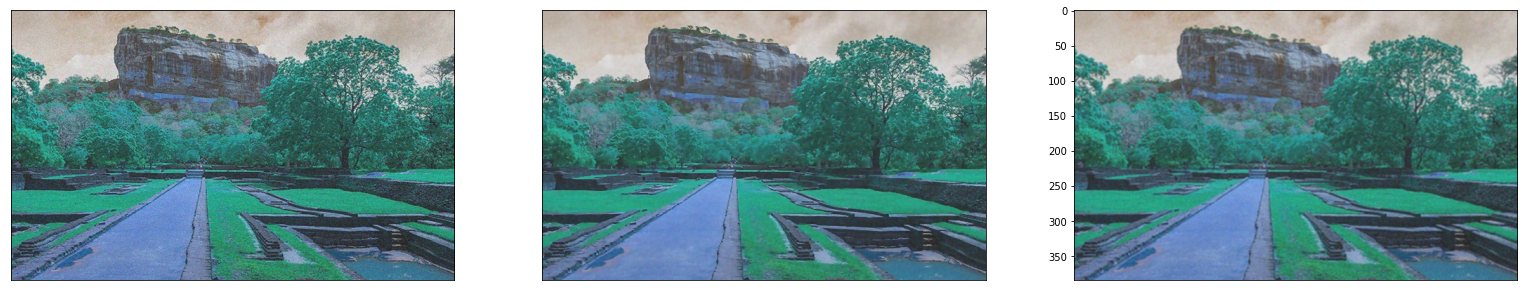

In [66]:
bilateral_filter_size = 5
bilateral_sigma_color = 50
bilateral_sigma_space = 50
bilateral_filtered_image = cv.bilateralFilter(noisy_image, bilateral_filter_size, bilateral_sigma_color, bilateral_sigma_space)

cv.imwrite('Outputs/Bilateral_Image.png',bilateral_filtered_image)

fig,ax = plt.subplots(1,3,figsize=(27,6))
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(bilateral_filtered_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(filtered_image,cmap='gray')
ax[2].set_xticks([]), ax[1].set_yticks([])
plt.show()

## Question 02
Counting the rice grains in the rice image

Expected answer: 101

Number of rice grains = 99


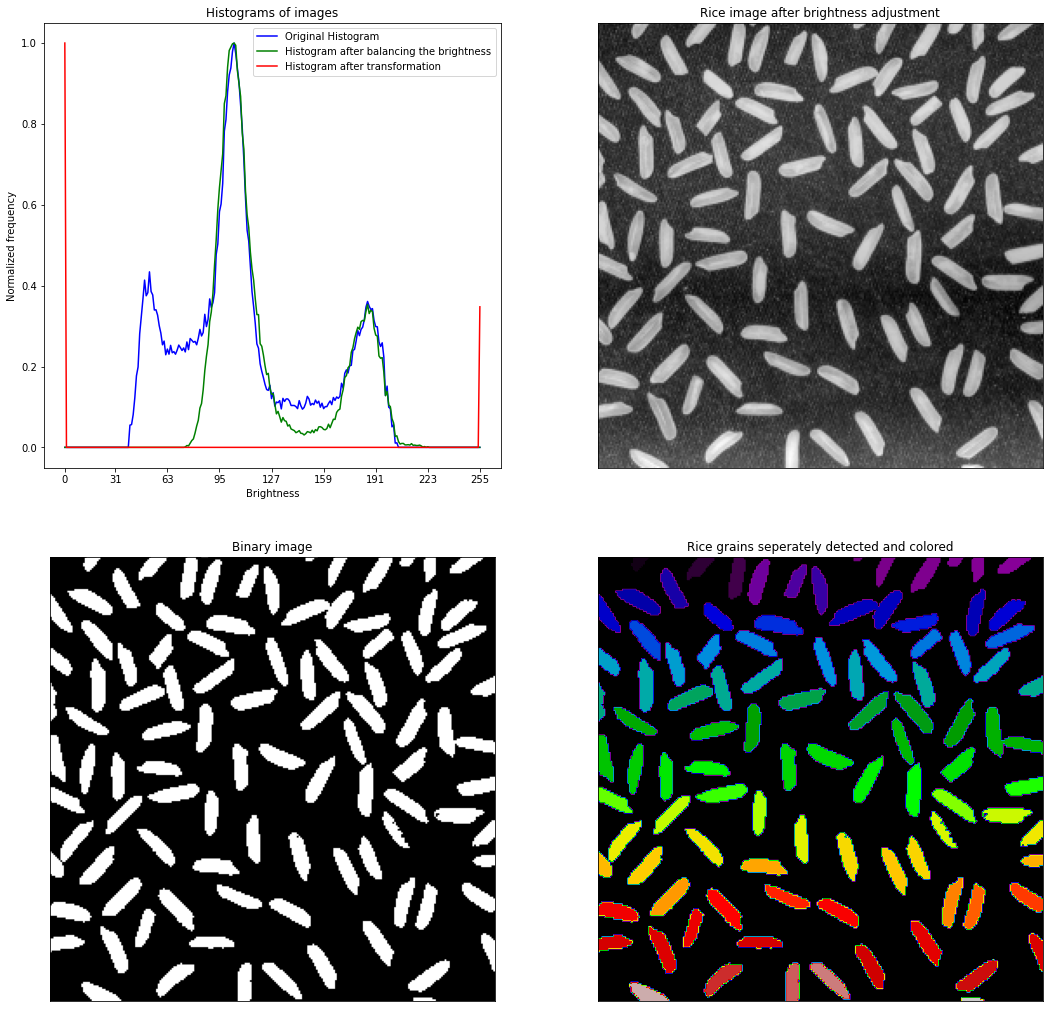

In [67]:
T1 = np.zeros(256,np.uint8)
T1[155:] = 255

rice_image = cv.imread('a01images/rice.png', cv.IMREAD_GRAYSCALE)

hist1 = cv.calcHist([rice_image],[0],None,[256],[0,256])
hist1 = hist1/hist1.max()

brightnessAdjust = np.zeros(rice_image.shape,dtype=np.uint8)
for i in range(100): brightnessAdjust[i+156,:] = i/1.3
rice_image = cv.add(rice_image,brightnessAdjust)

hist2 = cv.calcHist([rice_image],[0],None,[256],[0,256])
hist2 = hist2/hist2.max()

enhanced = T1[rice_image]
hist3 = cv.calcHist([enhanced],[0],None,[256],[0,256])
hist3 = hist3/hist3.max()

hist4 = cv.calcHist([enhanced],[0],None,[256],[0,256])
hist4 = hist4/hist4.max()

num_labels,labels = cv.connectedComponents(enhanced, connectivity = 4)
print("Number of rice grains =", num_labels-1)

fig,ax = plt.subplots(2,2,figsize=(18,18))
ax[0,0].set_title('Histograms of images')
ax[0,0].plot(hist1,'b',label='Original Histogram')
ax[0,0].plot(hist2,'g',label='Histogram after balancing the brightness')
ax[0,0].plot(hist4,'r',label='Histogram after transformation')
ax[0,0].set_xlabel('Brightness'), ax[0,0].set_ylabel('Normalized frequency'), ax[0,0].set_xticks([0,31,63,95,127,159,191,223,255])
ax[0,0].legend()
ax[0,1].set_title('Rice image after brightness adjustment')
ax[0,1].imshow(rice_image, cmap = 'gray')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])
ax[1,0].set_title('Binary image')
ax[1,0].imshow(enhanced, cmap = 'gray')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])
ax[1,1].imshow(labels, cmap = 'nipy_spectral')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
ax[1,1].set_title('Rice grains seperately detected and colored')
#plt.savefig('Outputs/Rice1.png')
plt.show()

Number of rice grains = 101


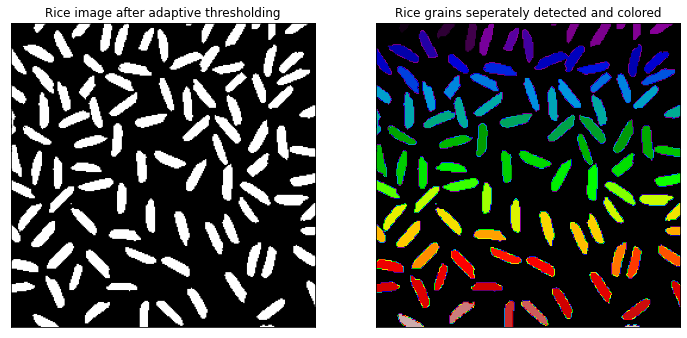

In [61]:
rice_image = cv.imread('a01images/rice.png', cv.IMREAD_GRAYSCALE)

enhanced_image = cv.adaptiveThreshold(rice_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 61, -30)
num_labels2,labels2 = cv.connectedComponents(enhanced_image, connectivity = 4)
print("Number of rice grains =", num_labels2-1)

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(enhanced_image, cmap = 'gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].set_title('Rice image after adaptive thresholding')
ax[1].imshow(labels2, cmap = 'nipy_spectral')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].set_title('Rice grains seperately detected and colored')
plt.savefig('Outputs/Rice2.png')
plt.show()

## Question 03
Image zooming using nearest-neighbor and bilinear interpolation

In [52]:
def nnzoomfloor(image, scale):
    """ Image zooming using nearest-neighbours interpolation """
    if (scale<=0 or scale>10): print("Cannot process the scale value")
    else:
        scaled_width = int(image.shape[0]*scale)
        scaled_height = int(image.shape[1]*scale)
        if len(image.shape)==3: scaled_image = np.zeros((scaled_width,scaled_height,3),dtype=np.uint8)
        else: scaled_image = np.zeros((scaled_width,scaled_height),dtype=np.uint8)
        for x in np.arange(scaled_width):
            for y in np.arange(scaled_height):
                x_0,y_0 = int(x/scale),int(y/scale)
                scaled_image[x,y] = image[x_0,y_0]
        return scaled_image,"nnzoomfloor"

def nnzoomround(image, scale):
    """ Image zooming using nearest-neighbours interpolation """
    if (scale<=0 or scale>10): print("Cannot process the scale value")
    else:
        scaled_width = int(image.shape[0]*scale)
        scaled_height = int(image.shape[1]*scale)
        if len(image.shape)==3: scaled_image = np.zeros((scaled_width,scaled_height,3),dtype=np.uint8)
        else: scaled_image = np.zeros((scaled_width,scaled_height),dtype=np.uint8)
        for x in np.arange(scaled_width):
            for y in np.arange(scaled_height):
                x_0,y_0 = np.round(x/scale).astype(int),np.round(y/scale).astype(int)
                if (x_0==image.shape[0]): x_0 = x_0-1
                if (y_0==image.shape[1]): y_0 = y_0-1
                scaled_image[x,y] = image[x_0,y_0]
        return scaled_image,"nnzoomround"

def bizoom(image, scale):
    """ Image zooming using bilinear interpolation """
    if (scale<=0 or scale>10): print("Cannot process the scale value")
    else:
        scaled_width = np.floor(image.shape[0]*scale).astype(np.int32)
        scaled_height = np.floor(image.shape[1]*scale).astype(np.int32)
        if len(image.shape)==3: scaled_image = np.zeros((scaled_width,scaled_height,3),dtype=np.uint8)
        else: scaled_image = np.zeros((scaled_width,scaled_height),dtype=np.uint8)
        for x in np.arange(scaled_width):
            for y in np.arange(scaled_height):
                x_i,y_i = x/scale,y/scale
                x_0,y_0 = int(x_i),int(y_i)
                if (x_i==x_0 and y_i==y_0): scaled_image[x,y] = image[x_0,y_0]
                else:
                    x_1,y_1 = x_0+1,y_0+1
                    if (x_1==image.shape[0] or y_1==image.shape[1]): scaled_image[x,y] = image[x_0,y_0]
                    else: scaled_image[x,y] = (y_1-y_i)*((x_1-x_i)*image[x_0,y_0]+(x_i-x_0)*image[x_1,y_0]) +\
                         (y_i-y_0)*((x_1-x_i)*image[x_0,y_1] + (x_i-x_0)*image[x_1,y_1])
        return scaled_image,"bizoom"

def ssd(image1, image2):
    diff = image1.astype(np.int64)-image2.astype(np.int64)
    if len(image1.shape)==3: return 100*np.sum(np.multiply(diff,diff))/(image1.shape[0]*image1.shape[1]*255*255*3)
    return 100*np.sum(np.multiply(diff,diff))/(image1.shape[0]*image1.shape[1]*255*255)

def myZoom(func, scale):
    for i in ["01","02","04","05","06","07"]:
        small_image = cv.imread("a01images/im"+i+"small.png", cv.IMREAD_COLOR)
        large_image = cv.imread("a01images/im"+i+".png", cv.IMREAD_COLOR)
        scaled_image,method = func(small_image, scale)
        cv.imwrite("Outputs/"+method+i+".jpg",scaled_image)
        print("SSD for image",i,"=",np.round(ssd(scaled_image,large_image),3),"%")

def cvNN(scale):
    for i in ["01","02","04","05","06","07"]:
        small_image = cv.imread("a01images/im"+i+"small.png", cv.IMREAD_COLOR)
        large_image = cv.imread("a01images/im"+i+".png", cv.IMREAD_COLOR)
        scaled_image = cv.resize(small_image, tuple([int(small_image.shape[1]*scale),int(small_image.shape[0]*scale)]),interpolation=cv.INTER_NEAREST)
        cv.imwrite("Outputs/cvNN"+i+".jpg",scaled_image)
        print("SSD for image",i,"=",np.round(ssd(scaled_image,large_image),3),"%")

def cvBi(scale):
    for i in ["01","02","04","05","06","07"]:
        small_image = cv.imread("a01images/im"+i+"small.png", cv.IMREAD_COLOR)
        large_image = cv.imread("a01images/im"+i+".png", cv.IMREAD_COLOR)
        scaled_image = cv.resize(small_image, tuple([int(small_image.shape[1]*scale),int(small_image.shape[0]*scale)]),interpolation=cv.INTER_LINEAR)
        cv.imwrite("Outputs/cvBi"+i+".jpg",scaled_image)
        print("SSD for image",i,"=",np.round(ssd(scaled_image,large_image),3),"%")


In [53]:
print('Nearest neighbors implementation with floor value')
myZoom(nnzoomfloor,4)
print('Nearest neighbors implementation with round value')
myZoom(nnzoomround,4)
print('Bilinear implementation')
myZoom(bizoom,4)
print('OpenCV nearest neighbors implementation')
cvNN(4)
print('OpenCV bilinear implementation')
cvBi(4)

Nearest neighbors implementation with floor value
SSD for image 01 = 0.21 %
SSD for image 02 = 0.041 %
SSD for image 04 = 1.211 %
SSD for image 05 = 0.44 %
SSD for image 06 = 0.289 %
SSD for image 07 = 0.289 %
Nearest neighbors implementation with round value
SSD for image 01 = 0.393 %
SSD for image 02 = 0.099 %
SSD for image 04 = 1.531 %
SSD for image 05 = 0.588 %
SSD for image 06 = 0.492 %
SSD for image 07 = 0.413 %
Bilinear implementation
SSD for image 01 = 0.308 %
SSD for image 02 = 0.075 %
SSD for image 04 = 1.39 %
SSD for image 05 = 0.517 %
SSD for image 06 = 0.393 %
SSD for image 07 = 0.358 %
OpenCV nearest neighbors implementation
SSD for image 01 = 0.21 %
SSD for image 02 = 0.041 %
SSD for image 04 = 1.211 %
SSD for image 05 = 0.44 %
SSD for image 06 = 0.289 %
SSD for image 07 = 0.289 %
OpenCV bilinear implementation
SSD for image 01 = 0.177 %
SSD for image 02 = 0.028 %
SSD for image 04 = 1.204 %
SSD for image 05 = 0.43 %
SSD for image 06 = 0.249 %
SSD for image 07 = 0.282 %


In [76]:
myZoom(bizoom,4)

SSD for image 01 = 0.308 %
SSD for image 02 = 0.075 %
SSD for image 04 = 1.39 %
SSD for image 05 = 0.517 %
SSD for image 06 = 0.393 %
SSD for image 07 = 0.358 %
